<a href="https://colab.research.google.com/github/trilgar/MSM-2021/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision.utils import save_image

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [9]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)
loader = DeviceDataLoader(loader, device)

In [10]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
			      torch.nn.Linear(18, 9)
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
			      torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Tanh()
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [11]:
# Model Initialization
model = AE()
model.to(device)
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

Epoch [1/20], Step [500/1875], Loss: 0.0525
Epoch [1/20], Step [1000/1875], Loss: 0.0433
Epoch [1/20], Step [1500/1875], Loss: 0.0460
Loss for epoch =  0.048724890734752016


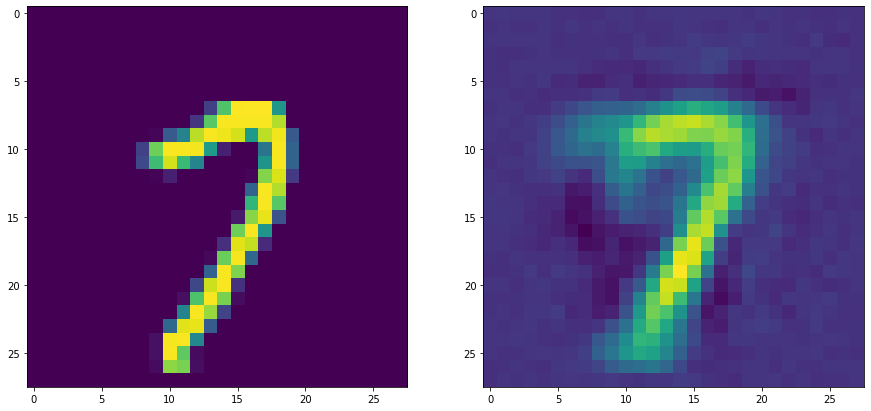

Epoch [2/20], Step [500/1875], Loss: 0.0423
Epoch [2/20], Step [1000/1875], Loss: 0.0372
Epoch [2/20], Step [1500/1875], Loss: 0.0339
Loss for epoch =  0.036087472493449846


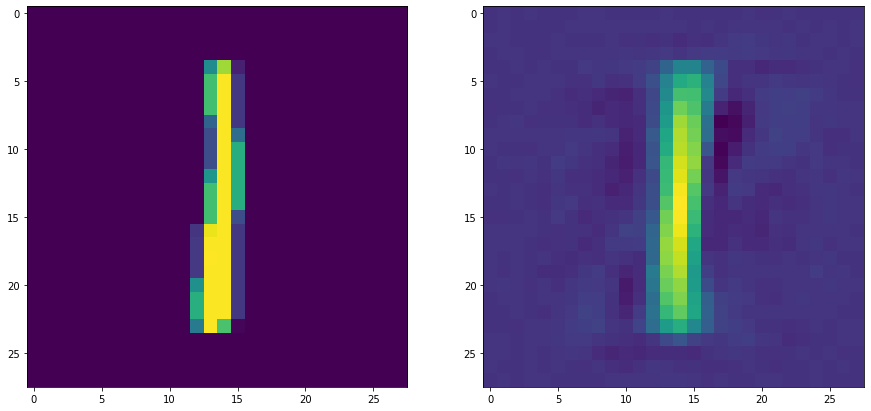

Epoch [3/20], Step [500/1875], Loss: 0.0359
Epoch [3/20], Step [1000/1875], Loss: 0.0326
Epoch [3/20], Step [1500/1875], Loss: 0.0307
Loss for epoch =  0.0320116897970438


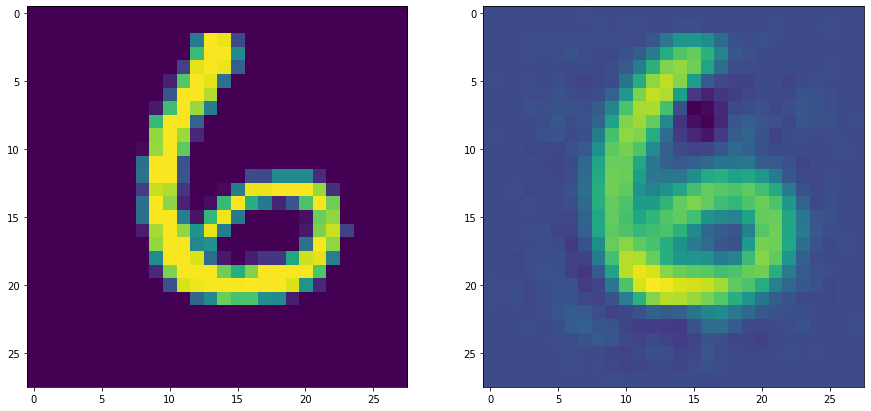

Epoch [4/20], Step [500/1875], Loss: 0.0324
Epoch [4/20], Step [1000/1875], Loss: 0.0321
Epoch [4/20], Step [1500/1875], Loss: 0.0281
Loss for epoch =  0.029804093728462856


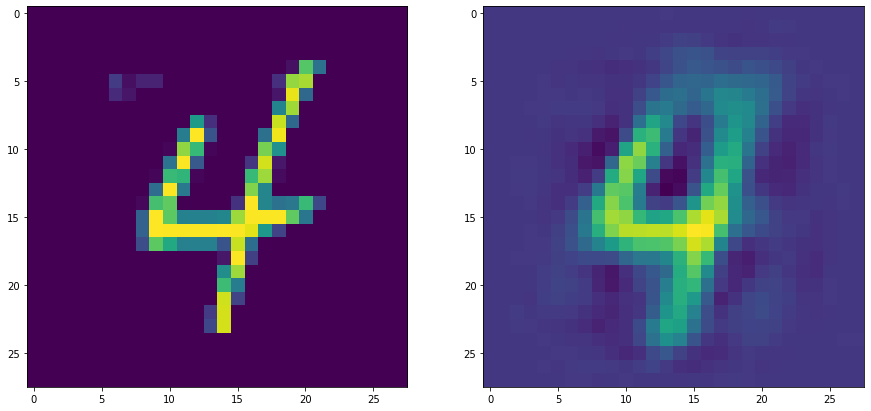

Epoch [5/20], Step [500/1875], Loss: 0.0288
Epoch [5/20], Step [1000/1875], Loss: 0.0291
Epoch [5/20], Step [1500/1875], Loss: 0.0246
Loss for epoch =  0.02815641179482142


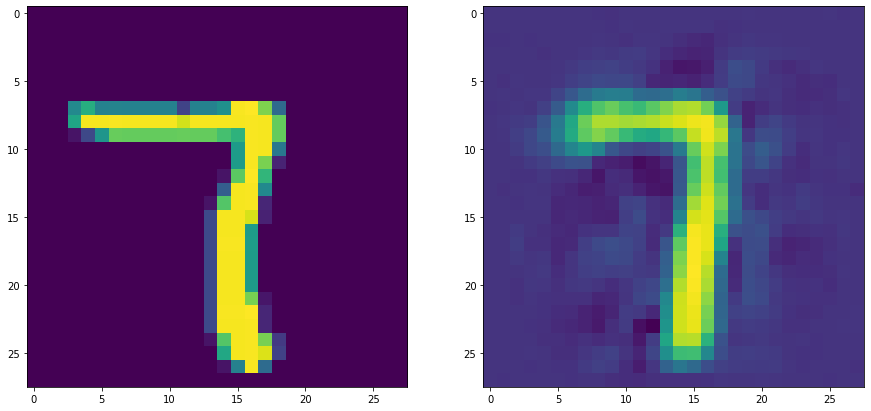

Epoch [6/20], Step [500/1875], Loss: 0.0260
Epoch [6/20], Step [1000/1875], Loss: 0.0224
Epoch [6/20], Step [1500/1875], Loss: 0.0272
Loss for epoch =  0.027334728958209355


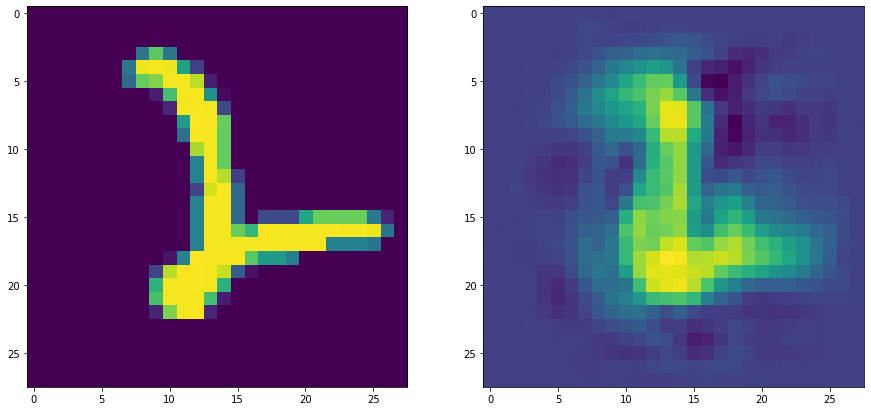

Epoch [7/20], Step [500/1875], Loss: 0.0257
Epoch [7/20], Step [1000/1875], Loss: 0.0237
Epoch [7/20], Step [1500/1875], Loss: 0.0287
Loss for epoch =  0.02681257189611594


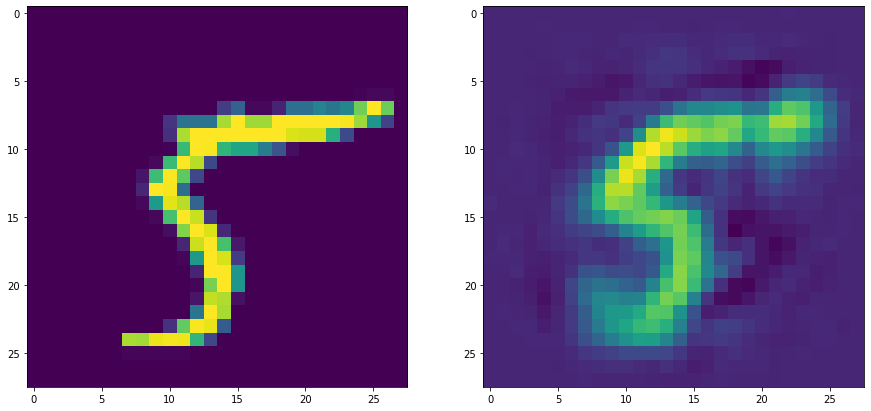

Epoch [8/20], Step [500/1875], Loss: 0.0310
Epoch [8/20], Step [1000/1875], Loss: 0.0253
Epoch [8/20], Step [1500/1875], Loss: 0.0230
Loss for epoch =  0.02641489476263523


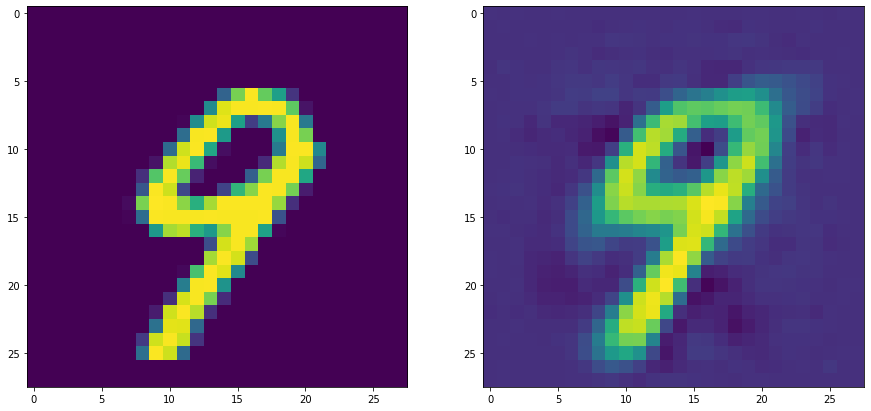

Epoch [9/20], Step [500/1875], Loss: 0.0239
Epoch [9/20], Step [1000/1875], Loss: 0.0288
Epoch [9/20], Step [1500/1875], Loss: 0.0273
Loss for epoch =  0.02607701731522878


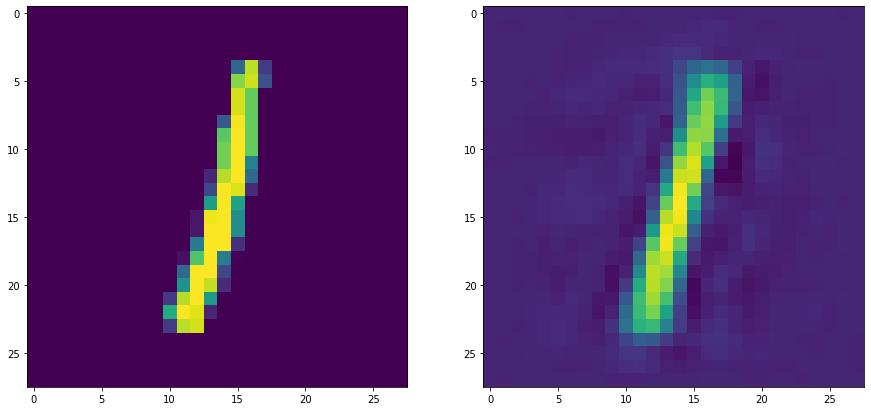

Epoch [10/20], Step [500/1875], Loss: 0.0261
Epoch [10/20], Step [1000/1875], Loss: 0.0246
Epoch [10/20], Step [1500/1875], Loss: 0.0247
Loss for epoch =  0.02580599003136158


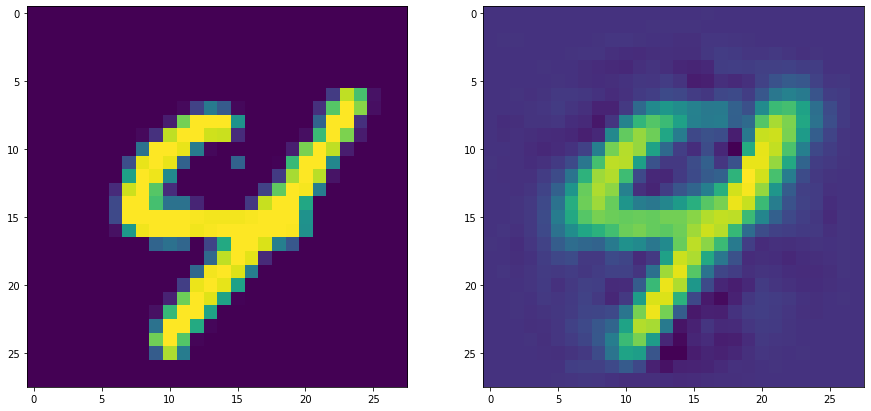

Epoch [11/20], Step [500/1875], Loss: 0.0285
Epoch [11/20], Step [1000/1875], Loss: 0.0216
Epoch [11/20], Step [1500/1875], Loss: 0.0267
Loss for epoch =  0.02537095234890779


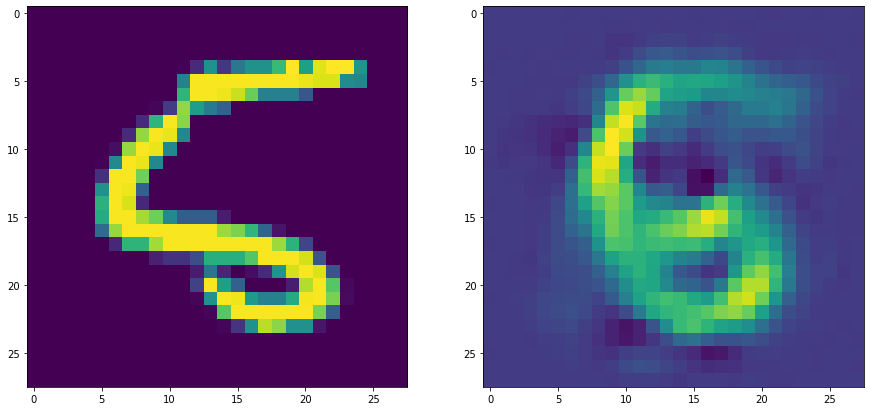

Epoch [12/20], Step [500/1875], Loss: 0.0291
Epoch [12/20], Step [1000/1875], Loss: 0.0237
Epoch [12/20], Step [1500/1875], Loss: 0.0279
Loss for epoch =  0.024965278499325116


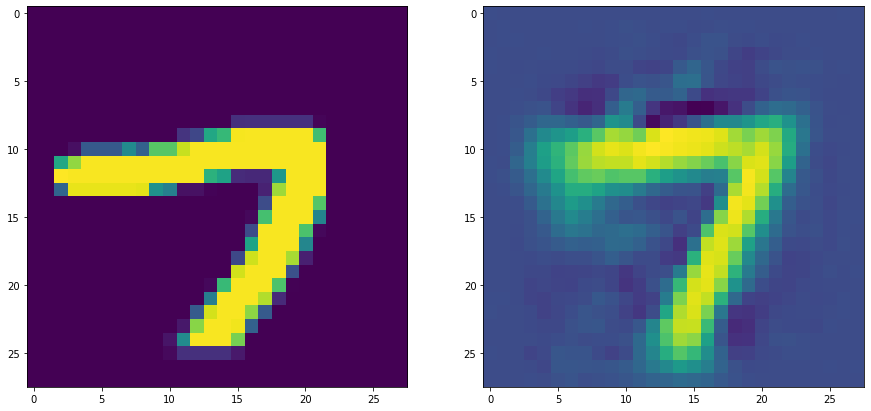

Epoch [13/20], Step [500/1875], Loss: 0.0254
Epoch [13/20], Step [1000/1875], Loss: 0.0258
Epoch [13/20], Step [1500/1875], Loss: 0.0271
Loss for epoch =  0.02468642950554689


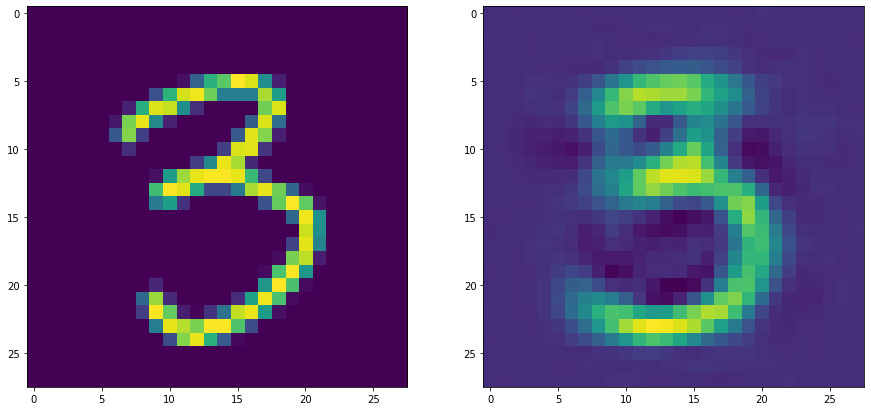

Epoch [14/20], Step [500/1875], Loss: 0.0291
Epoch [14/20], Step [1000/1875], Loss: 0.0248
Epoch [14/20], Step [1500/1875], Loss: 0.0229
Loss for epoch =  0.024472690321008364


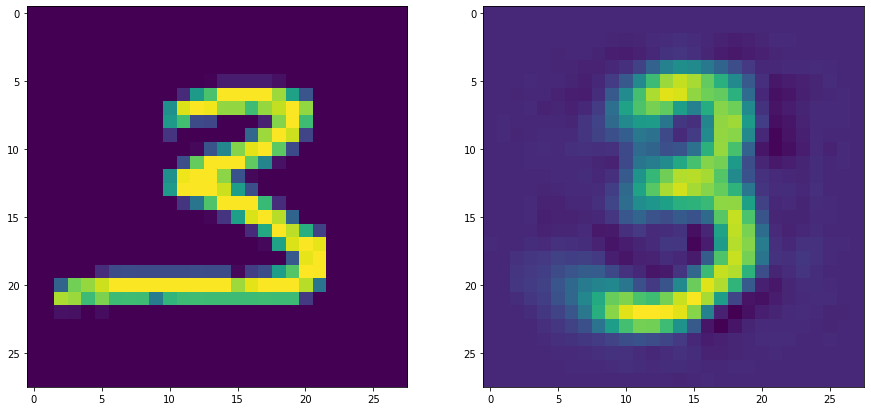

Epoch [15/20], Step [500/1875], Loss: 0.0221
Epoch [15/20], Step [1000/1875], Loss: 0.0238
Epoch [15/20], Step [1500/1875], Loss: 0.0232
Loss for epoch =  0.024278322978814444


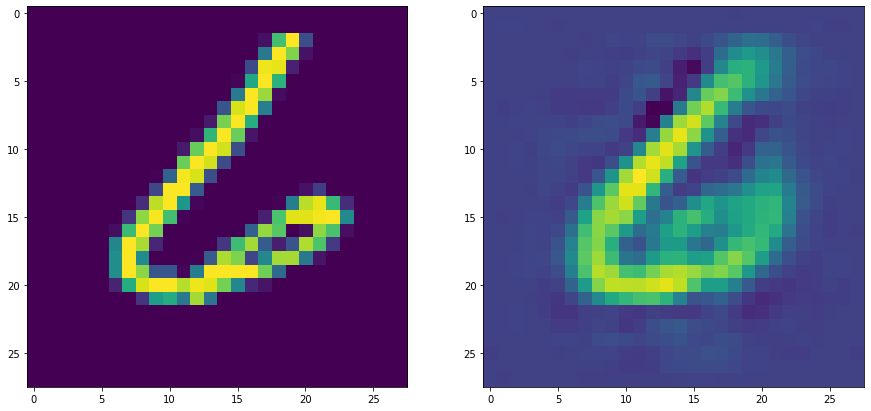

Epoch [16/20], Step [500/1875], Loss: 0.0230
Epoch [16/20], Step [1000/1875], Loss: 0.0268
Epoch [16/20], Step [1500/1875], Loss: 0.0279
Loss for epoch =  0.024104891447226207


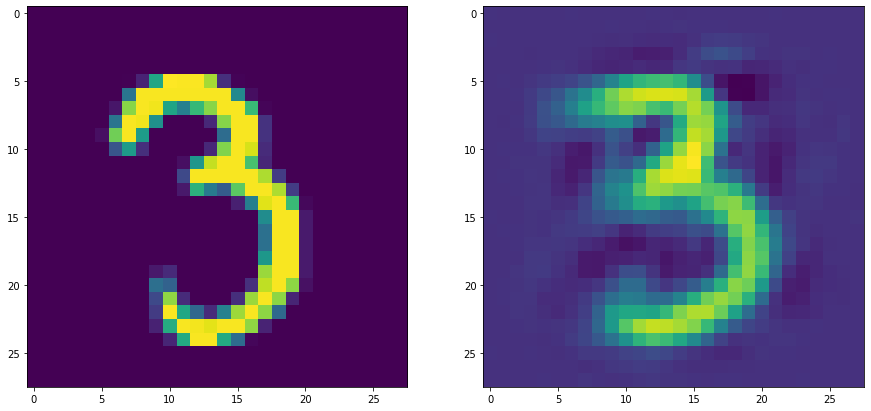

Epoch [17/20], Step [500/1875], Loss: 0.0224
Epoch [17/20], Step [1000/1875], Loss: 0.0245
Epoch [17/20], Step [1500/1875], Loss: 0.0233
Loss for epoch =  0.023965028883020083


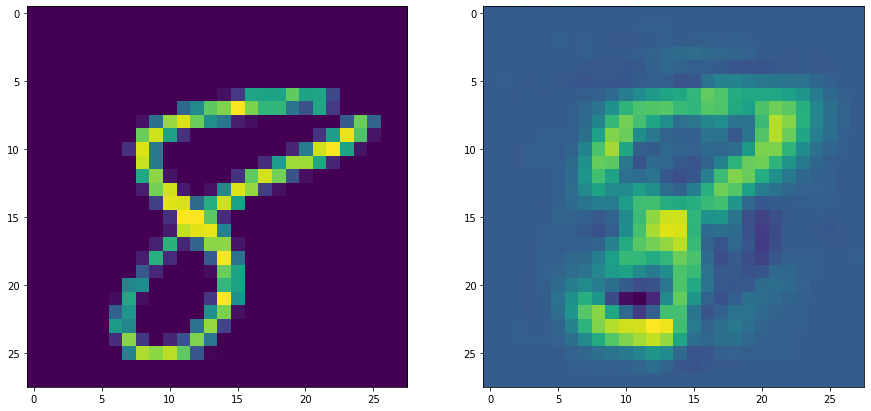

Epoch [18/20], Step [500/1875], Loss: 0.0242
Epoch [18/20], Step [1000/1875], Loss: 0.0239
Epoch [18/20], Step [1500/1875], Loss: 0.0256
Loss for epoch =  0.023820924207568168


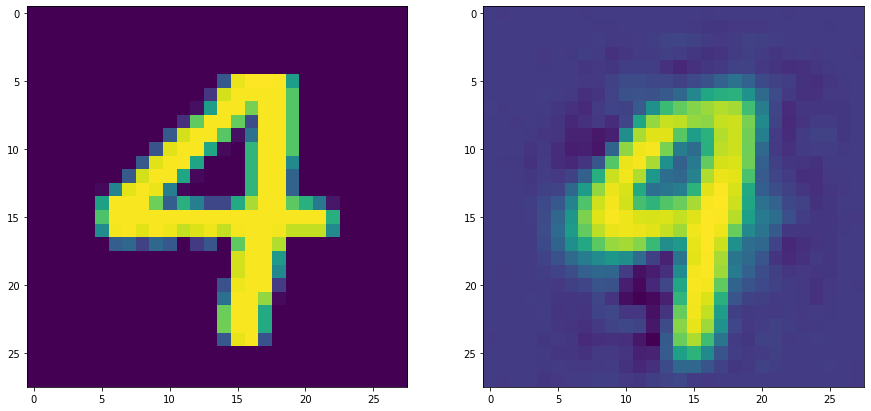

Epoch [19/20], Step [500/1875], Loss: 0.0253
Epoch [19/20], Step [1000/1875], Loss: 0.0191
Epoch [19/20], Step [1500/1875], Loss: 0.0245
Loss for epoch =  0.023682811683416367


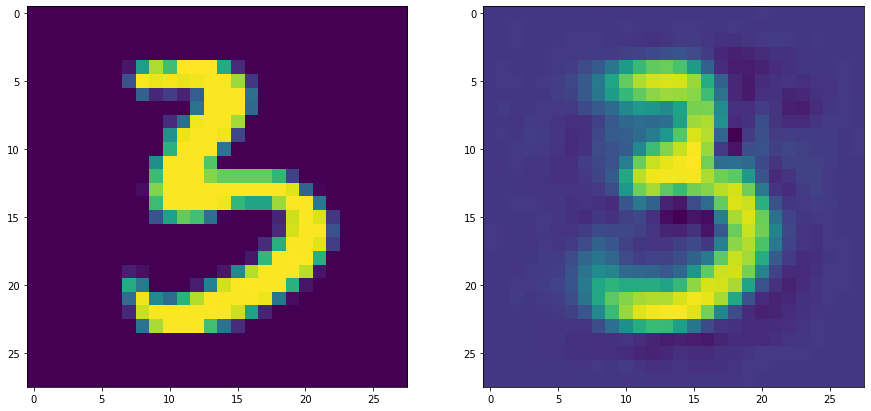

Epoch [20/20], Step [500/1875], Loss: 0.0247
Epoch [20/20], Step [1000/1875], Loss: 0.0256
Epoch [20/20], Step [1500/1875], Loss: 0.0203
Loss for epoch =  0.023507137873768808


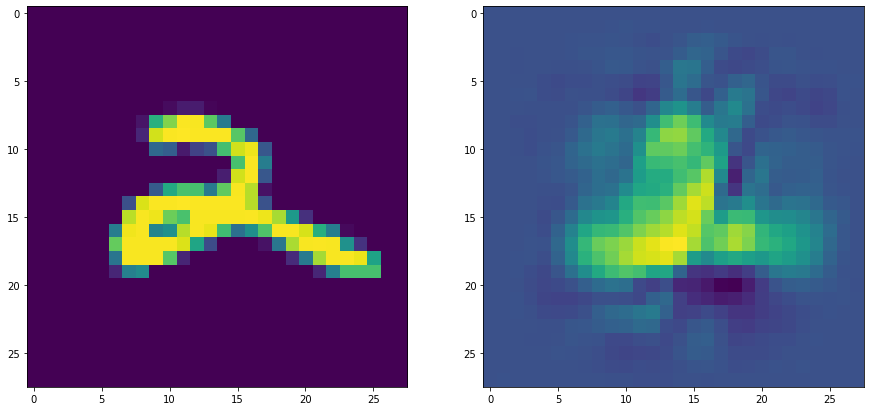

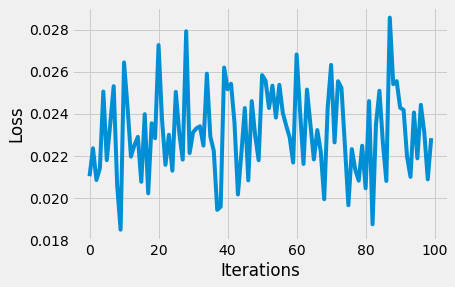

In [12]:
epochs = 20
outputs = []
losses = []
total_step = len(loader)
for epoch in range(epochs):
    mse = []
    for i, (image, _) in enumerate(loader):
        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28 * 28)

        # Output of Autoencoder
        reconstructed = model(image)

        # Calculating the loss function
        loss = loss_function(reconstructed, image)

        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.item())
        # Storing the losses in a list for plotting
        losses.append(loss)
        if (i + 1) % 500 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, epochs, i + 1, total_step, loss.item()))
    outputs.append((epochs, image, reconstructed))
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 8))
    img = reconstructed[-1].cpu()
    ax1.imshow(image[-1].reshape(28,28).cpu())
    ax2.imshow(img.reshape(28,28).detach().numpy())
    print('Loss for epoch = ', sum(mse)/len(mse))
    plt.show()

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

In [13]:
model.eval()


AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=36, bias=True)
    (5): ReLU()
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Linear(in_features=18, out_features=9, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=9, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=36, bias=True)
    (3): ReLU()
    (4): Linear(in_features=36, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=784, bias=True)
    (9): Tanh()
  )
)

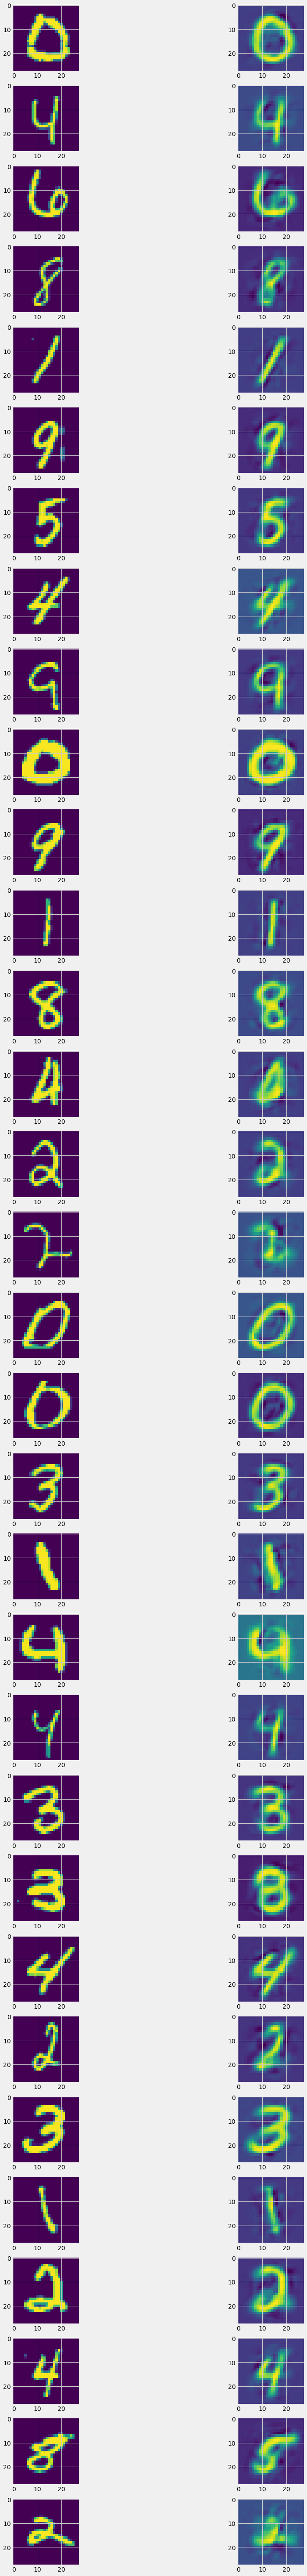

In [16]:
fig, ax = plt.subplots(nrows = len(image), ncols = 2, figsize = (15, 100))
for i, item in enumerate(image):
  item = item.reshape(-1, 28, 28)
  ax[i,0].imshow(item[0].cpu())
  rec = model(item.reshape(-1, 28 * 28))
  ax[i, 1].imshow(rec.reshape(28,28).cpu().detach().numpy())
plt.show()